# Foundations of Data Science
## Homework 5 

Student Name: Akshay Prakash Tambe

Student Netid: apt321@nyu.edu
***

### Part 1: Critique this plan (8 points)
1\. Your CIO invited his buddy from Tok Aton consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Tok Aton, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Tok Aton says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Tok Aton's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--------------------------------------------------------------------------
                            Targeted Audience Expansion             
                      Prepared by Tok Aton Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Tok Aton) have a large database of consumers who can be targeted.  We will build a predictive model to estimate which of these consumers are the most likely to adopt the product, and then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adoption of the service by a consumer, based on the data on your current customers of this service.  The model will be based on their demographics and their usage of the service. We believe that logistic regression is the best choice of method because it is a tried-and-true statistical modeling technique, and we can easily interpret the coefficients of the model to infer whether the attributes are statistically significant, and whether they make sense. If they are statistically significant and they do make sense, then we can have confidence that the model will be accurate in predicting service uptake. We will apply the model to our large database of consumers, and select out those who have not yet subscribed and whom the LR model predicts to be the most likely to subscribe.  To these we will send the targeted offer. As this is a fixed-profit-per-customer service, this also will in effect rank them by expected profit.
--------------------------------------------------------------------------
```

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [1]:
# Import Packages
import pandas as pd
from collections import OrderedDict

# Open File and read lines
datasource = open('wiki-RfA.txt', encoding='utf8')
datasource_lines = datasource.readlines()

# Dataset format to store data in dictionary format
dataset = OrderedDict()

for line in datasource_lines:
    # Replacing "new-line" character
    line = line.replace('\n', '')
    if line != '':
        # Split by ":"
        key, value = line.split(':',1)
        try:
            # Storing Key-Value Pairs
            dataset[key].append(str(value))
        except KeyError:
            # Initial first occurence of each key
            dataset[key] = [value]

# Construct DataFrame from dict
wiki_df = pd.DataFrame.from_dict(dataset, orient='columns', dtype=None)
wiki_df

,SRC,TGT,VOT,RES,YEA,DAT,TXT
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
5,Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important ro...
6,Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason n...
7,RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013",'''Support''' BDD already wields a broom pret...
8,Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected ...
9,Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not...


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [2]:
# Code the values as -1 or 0 as '0'
wiki_df['VOT'] = wiki_df['VOT'].replace(['-1','0'], 0)
# Code the values as 1 as '1'
wiki_df['VOT'] = wiki_df['VOT'].replace(['1'], 1)
wiki_df['VOT'].value_counts()

1    144451
0     53824
Name: VOT, dtype: int64

3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [3]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Put all of the text (TXT column) into a data frame called X 
X = wiki_df['TXT']
# Put the target variable in a data frame called Y (VOT column as the target variable)
Y = wiki_df['VOT']

# Make a train/test split where you give 75% of the data to training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a binary CountVectorizer with original single words as well as bigrams and english stop word list
binary_countvectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words = 'english')
# Fit these to the training data to extract a vocabulary
binary_countvectorizer = binary_countvectorizer.fit(X_train)

# Transform both the train and test data
X_train_binarycount = binary_countvectorizer.transform(X_train)
X_test_binarycount = binary_countvectorizer.transform(X_test)

# Create a TfidfVectorizer with original single words as well as bigrams and english stop word list
tfidfvectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = 'english')
# Fit these to the training data to extract a vocabulary
tfidfvectorizer = tfidfvectorizer.fit(X_train)

# Transform both the train and test data
X_train_tfidf = tfidfvectorizer.transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# Creating LogisticRegression() and BernoulliNB() models
for model, model_label in [(LogisticRegression(), "LR"), (BernoulliNB(), "NB")]:
    for train, test, method in [(X_train_binarycount, X_test_binarycount, 'binary'),(X_train_tfidf, X_test_tfidf, 'tfidf')]:
        # Fit the model
        model.fit(train, Y_train)
        # Calculate roc metrics
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(test)[:,1])
        auc = metrics.roc_auc_score(Y_test, model.predict_proba(test)[:, 1])
        # Plotting the AUC curve for both classifiers and both the binary and tfidf feature sets
        plt.plot(fpr, tpr, label=model_label + " (" + method + ") AUC = " + str(round(auc, 5)))
        # Labelling Axes and Title
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve for both classifiers with binary and tfidf feature sets")
plt.legend()
plt.show()

By looking at the above graph and the auc score from the roc curve, the `LogisticRegession()` model does a better job than `BernoulliNB()` model in case of both the Binary Count vectorization and tfidf vectorization. BernoulliNB assumes that all the features are conditionally independent. Real data sets are never perfectly independent but they can be close. In short Naive Bayes has a higher bias but lower variance compared to logistic regression. Hence, `BernoulliNB()` will give dependent features strong weights, so their influence would be double-counted. But logistic regression which is very sensitive to conditional likelihood and will compensate this by weighting them lower.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [6]:
import networkx as nx

network_df = wiki_df

network_df = network_df[['SRC', 'TGT', 'VOT', 'RES']]

# Map the node names to integer values
nodes = list(set(network_df['SRC'])|set(network_df['TGT']))
nodes_dict = dict(zip(nodes, range(len(nodes))))
network_df = network_df.applymap(lambda x: nodes_dict.get(x) if x in nodes_dict else x)

# Assigning VOT values in edges
edges = []
for index, row in network_df.iterrows():
    edges.append((row['SRC'], row['TGT'], row['VOT']))
    
# Creating graph structure with direction with self loops and parallel edges
graph = nx.MultiDiGraph()
graph.add_nodes_from(nodes)
graph.add_weighted_edges_from(edges)

# Prepare an edgefile for importing
nx.write_weighted_edgelist(graph, "wiki.edgefile")

2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [7]:
# Load the data as a graph object called 'Gwik'
Gwik = nx.read_weighted_edgelist("wiki.edgefile", create_using=nx.MultiDiGraph())
Gwik

3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [8]:
print(nx.info(Gwik))

Name: 
Type: MultiDiGraph
Number of nodes: 11381
Number of edges: 198275
Average in degree:  17.4216
Average out degree:  17.4216


4\. Compute the degree, betweness and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [9]:
# Computing Degree
degree = nx.degree_centrality(Gwik).values()
print(list(degree)[0:5])

[0.000351493848857645, 0.012478031634446399, 0.009402460456942005, 0.010456942003514939, 0.00905096660808436]


In [10]:
# Computing Betweenness
betweeness = nx.betweenness_centrality(Gwik).values()
print(list(betweeness)[0:5])

[0.0, 0.0002125683915213576, 4.0903898482990324e-05, 9.127599427976523e-05, 0.0002541920920328474]


In [11]:
# Computing Closeness
closeness = nx.closeness_centrality(Gwik).values()
print(list(closeness)[0:5])

[0.0, 0.2984034125050724, 0.2919868906290169, 0.28844406717713234, 0.27175841488372626]


5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (3 points)

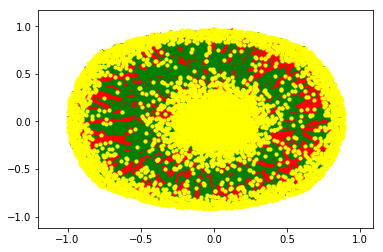

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

color_map = []

for index, row in network_df.iterrows():
    if row['VOT'] == 1:
        color_map.append('green')
    else:
        color_map.append('red')

# The visualization of edges to communicate vote values can be done by assigning colors to the edges representing the votes.
# e.g. edges with VOT = 0 can be assigned red color and those with VOT = 1 can be assigned green color

nx.draw_networkx(Gwik, node_color='yellow', edge_color=color_map, node_size=10, with_labels=False)

plt.show()

6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (Optional, for a bonus: 2 points)

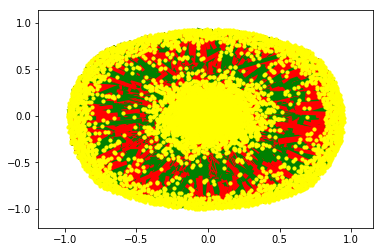

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

color_map = []

for index, row in network_df.iterrows():
    graph[row['SRC']][row['TGT']][0][row['VOT']] = int(row['RES'])
    
    if row['RES'] == '1':
        color_map.append('green')
    else:
        color_map.append('red')

nx.draw_networkx(Gwik, node_color='yellow', edge_color=color_map, node_size=10, with_labels=False)

plt.show()